# Building a Logistic Regression

Create a logistic regression based on the bank data provided. 

The data is based on the marketing campaign efforts of a Portuguese banking institution. The classification goal is to predict if the client will subscribe a term deposit (variable y).

Note that the first column of the dataset is the index.

Source: [Moro et al., 2014] S. Moro, P. Cortez and P. Rita. A Data-Driven Approach to Predict the Success of Bank Telemarketing. Decision Support Systems, Elsevier, 62:22-31, June 2014

# Understanding Logistic Regression Tables

Using the same code as in the previous exercise, try to interpret the summary table.

### More information about the dataset: 
Note that <i> interest rate</i> indicates the 3-month interest rate between banks and <i> duration </i> indicates the time since the last contact was made with a given consumer. The <i> previous </i> variable shows whether the last marketing campaign was successful with this customer. The <i>March</i> and <i> May </i> are Boolean variables that account for when the call was made to the specific customer and <i> credit </i> shows if the customer has enough credit to avoid defaulting.

<i> Notes: 
    <li> the first column of the dataset is an index one; </li>
    <li> you don't need the graph for this exercise; </li>
    <li> the dataset used is much bigger </li>
</i>

## Import the relevant libraries

In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
sns.set()

## Load the data

Load the ‘Bank_data.csv’ dataset.

In [2]:
data = pd.read_csv('Bank-data.csv')

In [3]:
# copy the dataset into a new dataframe

new_df = data.copy()

# remove the index column that comes with the data

new_df = new_df.drop(['Unnamed: 0'], axis = 1)

# seeing that the column y is to classify whether the client will subscribe into term deposit with the bank
# as such, we want to know if the campaign was successful, so we need to assign 1 and 0 to the label 'yes' and 'no'

new_df['y'] = new_df['y'].map({'yes': 1, 'no': 0})

# assessing values in the column May suggest that is not boolean in nature
# therefore, we need to correct this and assign values to 1 when it is more than 1

new_df.loc[new_df['may'] > 1, ['may']] = 1

# check for any missing/ null values

print(new_df.isnull().sum())

# ensure the boolean values have been assigned accordingly for each columns (credit, march, may, previous, y)

bol = ['credit','march','may','previous','y']

for i in bol:
    print(new_df[i].unique())

interest_rate    0
credit           0
march            0
may              0
previous         0
duration         0
y                0
dtype: int64
[0. 1.]
[1. 0.]
[0. 1.]
[0. 1.]
[0 1]


In [4]:
new_df

,interest_rate,credit,march,may,previous,duration,y
0,1.334,0.0,1.0,0.0,0.0,117.0,0
1,0.767,0.0,0.0,1.0,1.0,274.0,1
2,4.858,0.0,1.0,0.0,0.0,167.0,0
3,4.120,0.0,0.0,0.0,0.0,686.0,1
4,4.856,0.0,1.0,0.0,0.0,157.0,0
...,...,...,...,...,...,...,...
513,1.334,0.0,1.0,0.0,0.0,204.0,0
514,0.861,0.0,0.0,1.0,1.0,806.0,1
515,0.879,0.0,0.0,0.0,0.0,290.0,0
516,0.877,0.0,0.0,1.0,1.0,473.0,1


## Declare the dependent and independent variables

Use 'duration' as the independent variable.

In [5]:
x1 = new_df['duration']
y = new_df['y']

## Simple Logistic Regression

Run the regression.

In [6]:
x = sm.add_constant(x1)
log_reg = sm.Logit(y,x)
log_reg_result = log_reg.fit()

Optimization terminated successfully.
         Current function value: 0.546118
         Iterations 7


## Interpretation

In [7]:
log_reg_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                  518
Model:                          Logit   Df Residuals:                      516
Method:                           MLE   Df Model:                            1
Date:                Mon, 15 May 2023   Pseudo R-squ.:                  0.2121
Time:                        06:38:27   Log-Likelihood:                -282.89
converged:                       True   LL-Null:                       -359.05
Covariance Type:            nonrobust   LLR p-value:                 5.387e-35
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.7001      0.192     -8.863      0.000      -2.076      -1.324
duration       0.0051      0.001      9.159      0.000       0.004       0.006
==============================================================================
"""

# Interpretting single predictor and binary predictors

## Load the data

In [8]:
data_pred = pd.read_csv('Binary+predictors.csv')

In [9]:
# Assigining appropriate lables
# Admission (yes: 1, no: 0)
# Gender (male: 1, female: 0)

data_pred['Admitted'] = data_pred['Admitted'].map({'Yes': 1, 'No': 0})
data_pred['Gender'] = data_pred['Gender'].map({'Male': 1, 'Female': 0})

## Declare variables

In [10]:
# First, let's do only Gender as single independent variables

x1 = data_pred['Gender']
y = data_pred['Admitted']

## Simple Logistic Regression

In [11]:
# logistic summary

x = sm.add_constant(x1)
log_reg = sm.Logit(y,x)
log_reg_result = log_reg.fit()
log_reg_result.summary()

Optimization terminated successfully.
         Current function value: 0.572260
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Admitted   No. Observations:                  168
Model:                          Logit   Df Residuals:                      166
Method:                           MLE   Df Model:                            1
Date:                Mon, 15 May 2023   Pseudo R-squ.:                  0.1659
Time:                        06:38:27   Log-Likelihood:                -96.140
converged:                       True   LL-Null:                       -115.26
Covariance Type:            nonrobust   LLR p-value:                 6.283e-10
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.4351      0.287      4.995      0.000       0.872       1.998
Gender        -2.0786      0.363     -5.727      0.000      -2.790      -1.367
==============================================================================
"""

## Interpretation

In [12]:
# If we intepret the log ratio such as above (Male-to-female)

np.exp(-2.0786)

0.12510523698442316

In [13]:
# If we intepret the log ratio such when we switched the denominator and the numerator (Female-to-male)

np.exp(2.0786)

7.993270498536442

In [14]:
# Redo again but this time, let's include both SAT and Gender as our predictors

x1 = data_pred[['Gender','SAT']]
y = data_pred['Admitted']

In [15]:
# logistic summary

x = sm.add_constant(x1)
log_reg = sm.Logit(y,x)
log_reg_result = log_reg.fit()
log_reg_result.summary()

Optimization terminated successfully.
         Current function value: 0.120117
         Iterations 10


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Admitted   No. Observations:                  168
Model:                          Logit   Df Residuals:                      165
Method:                           MLE   Df Model:                            2
Date:                Mon, 15 May 2023   Pseudo R-squ.:                  0.8249
Time:                        06:38:27   Log-Likelihood:                -20.180
converged:                       True   LL-Null:                       -115.26
Covariance Type:            nonrobust   LLR p-value:                 5.118e-42
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -66.4040     16.321     -4.068      0.000     -98.394     -34.414
Gender        -1.9449      0.846     -2.299      0.022      -3.603      -0.287
SAT            0.0406      0.010      4.129      0.000       0.021       0.060
==============================================================================

Possibly complete quasi-separation: A fraction 0.27 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [16]:
# If we intepret the log ratio such as above (Male-to-female)

np.exp(-1.9449)

0.14300152277538664

In [17]:
# If we intepret the log ratio such when we switched the denominator and the numerator (Female-to-male)

np.exp(1.9449)

6.992932526814459

# Predicting and calculating the accuracy of the model

In [18]:
np.set_printoptions(formatter = {'float': lambda x: "{0:0.2f}".format(x)})
print("predicted values")
print("\n")
log_reg_result.predict()

predicted values




array([0.00, 1.00, 1.00, 0.23, 0.02, 0.99, 1.00, 1.00, 1.00, 0.01, 1.00,
       1.00, 0.76, 0.00, 0.60, 1.00, 0.11, 0.12, 0.51, 1.00, 1.00, 1.00,
       0.00, 0.01, 0.97, 1.00, 0.48, 0.99, 1.00, 0.99, 0.00, 0.83, 0.25,
       1.00, 1.00, 1.00, 0.31, 1.00, 0.23, 0.00, 0.02, 0.45, 1.00, 0.00,
       0.99, 0.00, 0.99, 0.00, 0.00, 0.01, 0.00, 1.00, 0.92, 0.02, 1.00,
       0.00, 0.37, 0.98, 0.12, 1.00, 0.00, 0.78, 1.00, 1.00, 0.98, 0.00,
       0.00, 0.00, 1.00, 0.00, 0.78, 0.12, 0.00, 0.99, 1.00, 1.00, 0.00,
       0.30, 1.00, 1.00, 0.00, 1.00, 1.00, 0.85, 1.00, 1.00, 0.00, 1.00,
       1.00, 0.89, 0.83, 0.00, 0.98, 0.97, 0.00, 1.00, 1.00, 0.03, 0.99,
       0.96, 1.00, 0.00, 1.00, 0.01, 0.01, 1.00, 1.00, 1.00, 0.00, 0.00,
       0.02, 0.33, 0.00, 1.00, 0.09, 0.00, 0.97, 0.00, 0.75, 1.00, 1.00,
       0.01, 0.01, 0.00, 1.00, 0.00, 0.99, 0.57, 0.54, 0.87, 0.83, 0.00,
       1.00, 0.00, 0.00, 0.00, 1.00, 0.04, 0.00, 0.01, 1.00, 0.99, 0.52,
       1.00, 1.00, 0.05, 0.00, 0.00, 0.00, 0.68, 1.

In [19]:
print("actual values")
print("\n")
print(np.array(y))

actual values


[0 1 1 0 0 1 1 1 1 0 1 1 1 0 0 1 0 0 1 1 1 1 0 0 1 1 1 1 1 1 0 1 0 1 1 1 0
 1 0 0 0 1 1 0 1 0 1 0 0 0 0 1 0 0 1 0 0 1 0 1 0 1 1 1 1 0 0 0 1 0 1 1 0 1
 1 1 0 1 1 1 0 1 1 0 1 1 0 1 1 1 0 0 1 1 0 1 1 0 1 1 1 0 1 0 0 1 1 1 0 0 0
 0 0 1 0 0 1 0 1 1 1 0 0 0 1 0 1 0 1 1 1 0 1 0 0 0 1 0 0 0 1 1 1 1 1 0 0 0
 0 1 1 1 1 1 1 0 1 1 0 1 0 1 1 1 1 0 0 0]


In [20]:
log_reg_result.pred_table()

array([[69.00, 5.00],
       [4.00, 90.00]])

In [21]:
cm_df = pd.DataFrame(log_reg_result.pred_table())
cm_df.columns = ['Predicted 0', 'Predicted 1']

cm_df = cm_df.rename(index = {0: "Actual 0", 1: "Actual 1"})

cm_df

,Predicted 0,Predicted 1
Actual 0,69.0,5.0
Actual 1,4.0,90.0


In [22]:
# calculating the accuracy of the model

obs = ((69+90)/(69+90+9)) * 100
obs

94.64285714285714

# Expanding the model by using all predictors, and calculate the accuracy of the model - Multivariate Logistic Regression model

We can be omitting many causal factors in our simple logistic model, so we instead switch to a multivariate logistic regression model. Add the ‘interest_rate’, ‘march’, ‘credit’ and ‘previous’ estimators to our model and run the regression again. 

## Load the data

In [3]:
new_df_all = data.copy()

In [4]:
# Remove or drop the Unnamed: 0 column

new_df_all = new_df_all.drop(['Unnamed: 0'], axis = 1)

# Assign boolean values in the y column

new_df_all['y'] = new_df_all['y'].map({'yes': 1, 'no':0})

# Checking the boolean values in the relevant columns

boolean = ['credit', 'march', 'may', 'previous', 'y']

for i in boolean:
    print(new_df_all[i].unique())
                             
# Fixing assignments of values in may when > 1 as 1

new_df_all.loc[new_df_all['may'] > 1, ['may']] = 1

# Checking (again)the boolean values in the relevant columns

print('\n')

boolean = ['credit', 'march', 'may', 'previous', 'y']

for i in boolean:
    print(new_df_all[i].unique())
    
# Checking for null/missing values

new_df_all.isnull().sum()

[0. 1.]
[1. 0.]
[0. 2. 1. 3. 4. 5.]
[0. 1.]
[0 1]


[0. 1.]
[1. 0.]
[0. 1.]
[0. 1.]
[0 1]


interest_rate    0
credit           0
march            0
may              0
previous         0
duration         0
y                0
dtype: int64

In [5]:
new_df_all.describe(include = 'all')

,interest_rate,credit,march,may,previous,duration,y
count,518.000000,518.000000,518.000000,518.000000,518.000000,518.000000,518.000000
mean,2.835776,0.034749,0.266409,0.247104,0.127413,382.177606,0.500000
std,1.876903,0.183321,0.442508,0.431745,0.333758,344.295990,0.500483
min,0.635000,0.000000,0.000000,0.000000,0.000000,9.000000,0.000000
25%,1.042750,0.000000,0.000000,0.000000,0.000000,155.000000,0.000000
50%,1.466000,0.000000,0.000000,0.000000,0.000000,266.500000,0.500000
75%,4.956500,0.000000,1.000000,0.000000,0.000000,482.750000,1.000000
max,4.970000,1.000000,1.000000,1.000000,1.000000,2653.000000,1.000000


##  Declare the dependent and independent variables

In [6]:
new_df_all

,interest_rate,credit,march,may,previous,duration,y
0,1.334,0.0,1.0,0.0,0.0,117.0,0
1,0.767,0.0,0.0,1.0,1.0,274.0,1
2,4.858,0.0,1.0,0.0,0.0,167.0,0
3,4.120,0.0,0.0,0.0,0.0,686.0,1
4,4.856,0.0,1.0,0.0,0.0,157.0,0
...,...,...,...,...,...,...,...
513,1.334,0.0,1.0,0.0,0.0,204.0,0
514,0.861,0.0,0.0,1.0,1.0,806.0,1
515,0.879,0.0,0.0,0.0,0.0,290.0,0
516,0.877,0.0,0.0,1.0,1.0,473.0,1


In [7]:
# First of all, we need to understand of how we can observe continuous variables against the y
# Among all of the predictors, duration is the only variable that is in that nature
# We will do this so that we can illustrate how this variable affects the y

x1 = new_df_all['duration']
y = new_df_all['y']

# Next, we do interest rate

x2 = new_df_all['interest_rate']

# We will create another dataframe for all interested variables too

x3 = new_df_all[['interest_rate','credit','march','may','previous','duration']]

## Simple Logistic Regression

In [8]:
# Proceed first with doing logistic regression using duration as the only independent variables

X1 =  sm.add_constant(x1)
log_reg_dur = sm.Logit(y,X1)
log_reg_res_dur = log_reg_dur.fit()

log_reg_res_dur.summary2()

# Note that, for a simple log regression with only using the variables, Log-likehood is still considerably bigger than the LL-null
# in terms of magnitude
# Let's see if we can do this better with we incorporate all variables (more on this later)

Optimization terminated successfully.
         Current function value: 0.546118
         Iterations 7


<class 'statsmodels.iolib.summary2.Summary'>
"""
                         Results: Logit
=================================================================
Model:              Logit            Pseudo R-squared: 0.212     
Dependent Variable: y                AIC:              569.7778  
Date:               2023-06-25 12:59 BIC:              578.2778  
No. Observations:   518              Log-Likelihood:   -282.89   
Df Model:           1                LL-Null:          -359.05   
Df Residuals:       516              LLR p-value:      5.3865e-35
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     7.0000                                       
------------------------------------------------------------------
               Coef.   Std.Err.     z     P>|z|    [0.025   0.975]
------------------------------------------------------------------
const         -1.7001    0.1918  -8.8635  0.0000  -2.0761  -1.3242
duration       0.0051    0.0006   9.1594  0.0000   0.0040   0.0062
=================================================================

"""

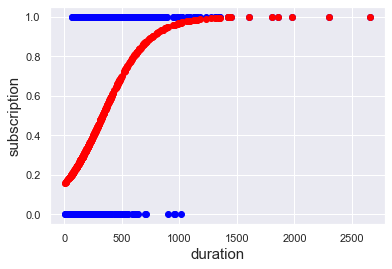

In [9]:
# Predicting the probabilities for Subcrscription model based on duration
plt.scatter(x1,y, color ='blue')
plt.xlabel('duration', fontsize = 15)
plt.ylabel('subscription', fontsize = 15)

# Predict probabilities for each value of duration
x_range = x1
y_pred = log_reg_res_dur.predict(sm.add_constant(x1))

# Add a line plot of the predicted probabilities to the scatter plot
plt.scatter(x_range, y_pred, color='red')
plt.show()

# As we can see, duration alone cannot be the only determining factor in deciding the subscription# Although we can that the pattern such as that above 1,000 days since last contacted, there is chance that customers might subscribe
# But we could not said the same those with shorter period of time < 1,000 days

In [10]:
# Next, we continue with interest rate as the only independent variables

X2 =  sm.add_constant(x2)
log_reg_rate = sm.Logit(y,X2)
log_reg_res_rate = log_reg_rate.fit()

log_reg_res_rate.summary2()

# Very similar to the previous results...

Optimization terminated successfully.
         Current function value: 0.568641
         Iterations 5


<class 'statsmodels.iolib.summary2.Summary'>
"""
                         Results: Logit
=================================================================
Model:              Logit            Pseudo R-squared: 0.180     
Dependent Variable: y                AIC:              593.1121  
Date:               2023-06-25 12:59 BIC:              601.6120  
No. Observations:   518              Log-Likelihood:   -294.56   
Df Model:           1                LL-Null:          -359.05   
Df Residuals:       516              LLR p-value:      6.8216e-30
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     5.0000                                       
-----------------------------------------------------------------
                  Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
-----------------------------------------------------------------
const             1.6146   0.1815   8.8963 0.0000  1.2589  1.9704
interest_rate    -0.5734   0.0544 -10.5313 0.0000 -0.6801 -0.4667
=================================================================

"""

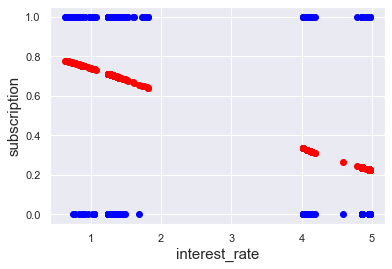

In [11]:
# Predicting the probabilities for Subcrscription model based on interest rate
plt.scatter(x2,y, color ='blue')
plt.xlabel('interest_rate', fontsize = 15)
plt.ylabel('subscription', fontsize = 15)

# Predict probabilities for each value of interest_rate
x_range = x2
y_pred = log_reg_res_rate.predict(sm.add_constant(x2))

# Add a line plot of the predicted probabilities to the scatter plot
plt.scatter(x_range, y_pred, color='red')
plt.show()

# The plot shows that there is high concentration of subscription whereby if the interest_rate is low# Prediction is way off for both low and high regimes of interest_rate, espeically so in the low regime where subscription is the subset of 1 and 0
# where interest_rate is predicted to influence the customers to subscrine, whihc isn't the case# Same goes to higher interest regime, where prediction does not match to those subscribe anyway
# Again, irregardless of the interest rates, customers choose to subscribe anyway

In [12]:
# Probability of subscription when interest rate is below 3

below_3_yes = new_df_all.loc[(new_df_all['y'] == 1) & (new_df_all['interest_rate'] < 2), ['interest_rate']]
below_3_no = new_df_all.loc[(new_df_all['y'] == 0) & (new_df_all['interest_rate'] < 2), ['interest_rate']]

print(below_3_yes['interest_rate'].shape[0])
print(below_3_no['interest_rate'].shape[0])

print((below_3_yes.shape[0])/(below_3_yes.shape[0] + below_3_no.shape[0]))

# Probability of subscription when interest rate is above 3

above_3_yes = new_df_all.loc[(new_df_all['y'] == 1) & (new_df_all['interest_rate'] > 2), ['interest_rate']]
above_3_no = new_df_all.loc[(new_df_all['y'] == 0) & (new_df_all['interest_rate'] > 2), ['interest_rate']]

print(above_3_yes['interest_rate'].shape[0])
print(above_3_no['interest_rate'].shape[0])

print((above_3_yes.shape[0])/(above_3_yes.shape[0] + above_3_no.shape[0]))


#above_3 = new_df_all.loc[(new_df_all['y'] == 1) & (new_df_all['interest_rate'] < 2), ['interest_rate']]

197
76
0.7216117216117216
62
183
0.2530612244897959


## Multivariate Logistic Regression

In [13]:
X3 = sm.add_constant(x3)
log_reg_all = sm.Logit(y,X3)
log_reg_all_res = log_reg_all.fit()

log_reg_all_res.summary2()

Optimization terminated successfully.
         Current function value: 0.335824
         Iterations 7


<class 'statsmodels.iolib.summary2.Summary'>
"""
                         Results: Logit
=================================================================
Model:              Logit            Pseudo R-squared: 0.516     
Dependent Variable: y                AIC:              361.9138  
Date:               2023-06-25 13:00 BIC:              391.6636  
No. Observations:   518              Log-Likelihood:   -173.96   
Df Model:           6                LL-Null:          -359.05   
Df Residuals:       511              LLR p-value:      7.1356e-77
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     7.0000                                       
-----------------------------------------------------------------
                   Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
-----------------------------------------------------------------
const              0.1317   0.3534  0.3726 0.7094 -0.5610  0.8244
interest_rate     -0.8267   0.0946 -8.7360 0.0000 -1.0122 -0.6413
credit             2.3249   1.0891  2.1347 0.0328  0.1903  4.4594
march             -1.8651   0.3324 -5.6107 0.0000 -2.5166 -1.2135
may               -0.3628   0.3893 -0.9319 0.3514 -1.1259  0.4002
previous           1.7903   0.5703  3.1391 0.0017  0.6725  2.9080
duration           0.0069   0.0007  9.3700 0.0000  0.0055  0.0084
=================================================================

"""

## Predicting and calculating the accuracy of the model

In [14]:
def confusion_matrix(data,actual_values,model):
        
        # Confusion matrix 
        
        # Parameters
        # ----------
        # data: data frame or array
            # data is a data frame formatted in the same way as your input data (without the actual values)
            # e.g. const, var1, var2, etc. Order is very important!
        # actual_values: data frame or array
            # These are the actual values from the test_data
            # In the case of a logistic regression, it should be a single column with 0s and 1s
            
        # model: a LogitResults object
            # this is the variable where you have the fitted model 
            # e.g. results_log in this course
        # ----------
        
        #Predict the values using the Logit model where the predict() will assign any values to either 1s or 0s where the threshold is 0.05
        pred_values = model.predict(data)
        # Specify the bins 
        bins=np.array([0,0.5,1])
        # Create a histogram, where if values are between 0 and 0.5 tell will be considered 0
        # if they are between 0.5 and 1, they will be considered 1
        cm = np.histogram2d(actual_values, pred_values, bins=bins)[0]
        # Calculate the accuracy
        accuracy = (cm[0,0]+cm[1,1])/cm.sum()
        # Return the confusion matrix and 
        cm = pd.DataFrame(cm)
        cm.columns = ['Predicted 0', 'Predicted 1']
        cm = cm.rename(index = {0: 'Actual 0', 1: 'Actual 1'})
        cm
        return cm, accuracy

In [15]:
# First (duration) model

confusion_matrix(X1,y,log_reg_res_dur)

(          Predicted 0  Predicted 1
 Actual 0        204.0         55.0
 Actual 1        104.0        155.0,
 0.693050193050193)

In [16]:
# Second (interest_rate) model

confusion_matrix(X2,y,log_reg_res_rate)

(          Predicted 0  Predicted 1
 Actual 0        183.0         76.0
 Actual 1         62.0        197.0,
 0.7335907335907336)

In [17]:
# Multivariate model

confusion_matrix(X3,y,log_reg_all_res)


(          Predicted 0  Predicted 1
 Actual 0        220.0         39.0
 Actual 1         27.0        232.0,
 0.8725868725868726)

# Eliminating the possibilities of Overtraining the model (splitting datasets)

## Load the data

In [18]:
new_df_all_2 = data.copy()

In [19]:
# Remove or drop the Unnamed: 0 column

new_df_all_2 = new_df_all_2.drop(['Unnamed: 0'], axis = 1)

# Assign boolean values in the y column

new_df_all_2['y'] = new_df_all_2['y'].map({'yes': 1, 'no':0})

# Checking the boolean values in the relevant columns

boolean = ['credit', 'march', 'may', 'previous', 'y']

for i in boolean:
    print(new_df_all_2[i].unique())
                             
# Fixing assignments of values in may when > 1 as 1

new_df_all_2.loc[new_df_all['may'] > 1, ['may']] = 1

# Checking (again)the boolean values in the relevant columns

print('\n')

boolean = ['credit', 'march', 'may', 'previous', 'y']

for i in boolean:
    print(new_df_all_2[i].unique())
    
# Checking for null/missing values

new_df_all_2.isnull().sum()

[0. 1.]
[1. 0.]
[0. 2. 1. 3. 4. 5.]
[0. 1.]
[0 1]


[0. 1.]
[1. 0.]
[0. 2. 1. 3. 4. 5.]
[0. 1.]
[0 1]


interest_rate    0
credit           0
march            0
may              0
previous         0
duration         0
y                0
dtype: int64

In [20]:
new_df_all_2.describe(include = 'all')

,interest_rate,credit,march,may,previous,duration,y
count,518.000000,518.000000,518.000000,518.000000,518.000000,518.000000,518.000000
mean,2.835776,0.034749,0.266409,0.388031,0.127413,382.177606,0.500000
std,1.876903,0.183321,0.442508,0.814527,0.333758,344.295990,0.500483
min,0.635000,0.000000,0.000000,0.000000,0.000000,9.000000,0.000000
25%,1.042750,0.000000,0.000000,0.000000,0.000000,155.000000,0.000000
50%,1.466000,0.000000,0.000000,0.000000,0.000000,266.500000,0.500000
75%,4.956500,0.000000,1.000000,0.000000,0.000000,482.750000,1.000000
max,4.970000,1.000000,1.000000,5.000000,1.000000,2653.000000,1.000000


## Declare the dependent and independent variables

In [21]:
# As per usual, we will assign the variables just like for our miltivariate logistic regression

y = new_df_all_2['y']

x3 = new_df_all_2[['interest_rate','credit','march','may','previous','duration']]

## Splitting the dataset

In [22]:
# Split the data set
# Split the variables with an 80-20 split and some random state
# To have the same split, use random_state = 365

x_train, x_test, y_train, y_test = train_test_split(x3, y, test_size = 0.2, random_state = 365)

# Verifying the shape of the training set and testing set
# Ideally, we want our training data to have the most data than our testing data

print(x3.shape[0])
print("Size of the training dataset: ", x_train.shape[0])
print("Size of the testing dataset: ", x_test.shape[0])

# We also need to ensure that the columns orders of the train and test are both the same

print("Columns order of the training dataset: ", x_train.columns)
print("Columns order of the testing dataset: ", x_test.columns)

# To prepare for the testing of our data, we can add constant to our testing data to match with the training data

X_test = sm.add_constant(x_test) 
X_test

518
Size of the training dataset:  414
Size of the testing dataset:  104
Columns order of the training dataset:  Index(['interest_rate', 'credit', 'march', 'may', 'previous', 'duration'], dtype='object')
Columns order of the testing dataset:  Index(['interest_rate', 'credit', 'march', 'may', 'previous', 'duration'], dtype='object')


,const,interest_rate,credit,march,may,previous,duration
453,1.0,1.281,0.0,1.0,1.0,0.0,829.0
436,1.0,4.855,0.0,1.0,0.0,0.0,135.0
62,1.0,1.000,0.0,0.0,0.0,0.0,767.0
195,1.0,4.959,0.0,0.0,0.0,0.0,11.0
475,1.0,0.677,0.0,1.0,4.0,1.0,211.0
...,...,...,...,...,...,...,...
116,1.0,4.965,0.0,0.0,0.0,0.0,119.0
143,1.0,0.767,0.0,0.0,0.0,0.0,286.0
402,1.0,4.856,0.0,1.0,0.0,0.0,374.0
323,1.0,4.964,0.0,0.0,0.0,0.0,111.0


## Multivariate Logistic Regression

In [23]:
# Using the training dataset as benchmark for the regresion

X_train = sm.add_constant(x_train) # Remember that we add constant into the training dataset, so we shall do the same (see above on the splitting dataset)
log_reg_actual = sm.Logit(y_train,X_train)
log_reg_actual_res = log_reg_actual.fit()

log_reg_actual_res.summary2()

Optimization terminated successfully.
         Current function value: 0.337974
         Iterations 7


<class 'statsmodels.iolib.summary2.Summary'>
"""
                         Results: Logit
=================================================================
Model:              Logit            Pseudo R-squared: 0.512     
Dependent Variable: y                AIC:              293.8425  
Date:               2023-06-25 13:00 BIC:              322.0235  
No. Observations:   414              Log-Likelihood:   -139.92   
Df Model:           6                LL-Null:          -286.94   
Df Residuals:       407              LLR p-value:      1.5440e-60
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     7.0000                                       
-----------------------------------------------------------------
                   Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
-----------------------------------------------------------------
const             -0.1417   0.3775 -0.3753 0.7074 -0.8816  0.5982
interest_rate     -0.7637   0.1024 -7.4563 0.0000 -0.9645 -0.5630
credit             2.1890   1.1042  1.9824 0.0474  0.0248  4.3532
march             -2.0190   0.3872 -5.2142 0.0000 -2.7779 -1.2601
may                0.0695   0.2564  0.2712 0.7862 -0.4330  0.5720
previous           1.4378   0.6778  2.1214 0.0339  0.1094  2.7663
duration           0.0070   0.0008  8.6542 0.0000  0.0054  0.0086
=================================================================

"""

## Predicting and calculating the accuracy of the trained model

In [24]:
def confusion_matrix(data,actual_values,model):
        
        # Confusion matrix 
        
        # Parameters
        # ----------
        # data: data frame or array
            # data is a data frame formatted in the same way as your input data (without the actual values)
            # e.g. const, var1, var2, etc. Order is very important!
        # actual_values: data frame or array
            # These are the actual values from the test_data
            # In the case of a logistic regression, it should be a single column with 0s and 1s
            
        # model: a LogitResults object
            # this is the variable where you have the fitted model 
            # e.g. results_log in this course
        # ----------
        
        #Predict the values using the Logit model where the predict() will assign any values to either 1s or 0s where the threshold is 0.05
        pred_values = model.predict(data)
        # Specify the bins 
        bins=np.array([0,0.5,1])
        # Create a histogram, where if values are between 0 and 0.5 tell will be considered 0
        # if they are between 0.5 and 1, they will be considered 1
        cm = np.histogram2d(actual_values, pred_values, bins=bins)[0]
        # Calculate the accuracy
        accuracy = (cm[0,0]+cm[1,1])/cm.sum()
        # Calculate the misclassifcation
        misclassification_rate = (cm[0,1]+cm[1,0])/cm.sum()
        # Return the confusion matrix and 
        cm = pd.DataFrame(cm)
        cm.columns = ['Predicted 0', 'Predicted 1']
        cm = cm.rename(index = {0: 'Actual 0', 1: 'Actual 1'})
        cm
        return cm, accuracy, misclassification_rate

In [25]:
cm_training = confusion_matrix(X_train,y_train,log_reg_actual_res)
cm_training

(          Predicted 0  Predicted 1
 Actual 0        174.0         31.0
 Actual 1         24.0        185.0,
 0.8671497584541062,
 0.13285024154589373)

In [26]:
cm_testing = confusion_matrix(X_test, y_test, log_reg_actual_res)
cm_testing

(          Predicted 0  Predicted 1
 Actual 0         48.0          6.0
 Actual 1          7.0         43.0,
 0.875,
 0.125)

Looking at the test acccuracy we see a number which is a tiny but lower: 86.71%, compared to 87.5% for train accuracy. 

In general, we always expect the test accuracy to be lower than the train one. If the test accuracy is higher, this is just due to luck.

Note that when you run the regression, you may get different numbers than us!